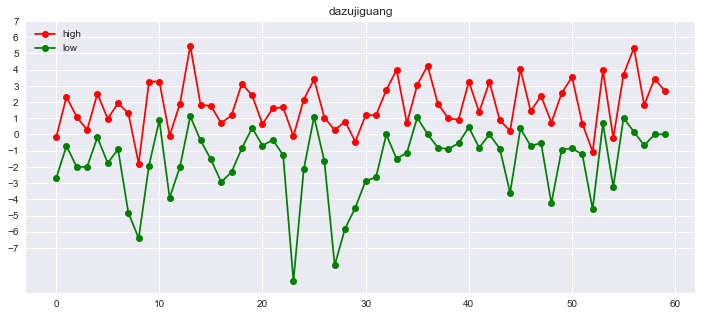

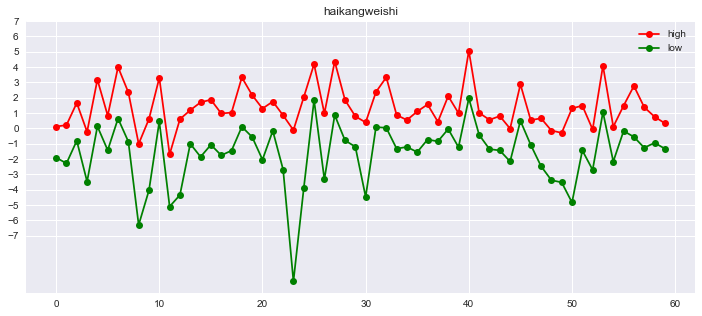

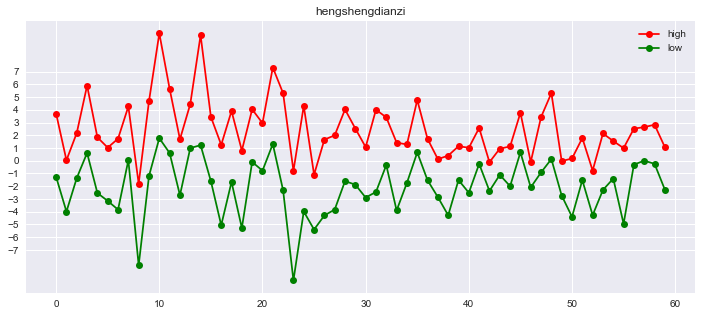

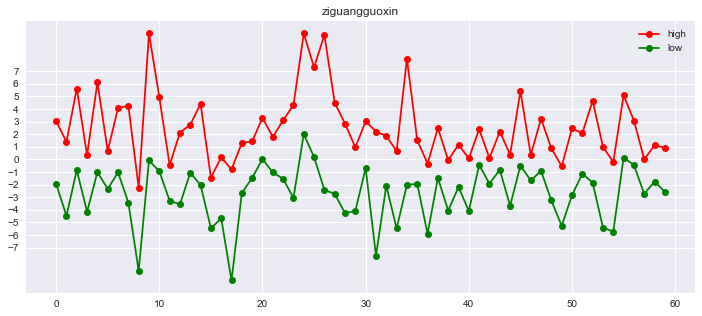

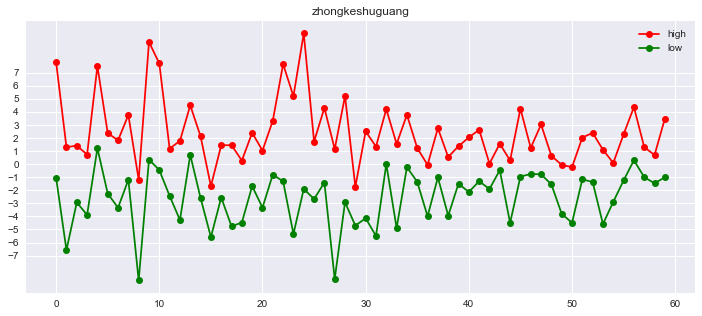

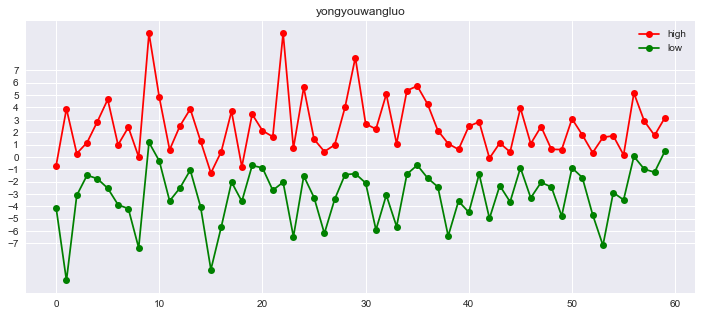

In [2]:
import tushare as ts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble, linear_model, tree, svm, neighbors
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

%matplotlib inline

sns.set()
length = 60

class Stock:
    def __init__(self, name, code):
        self.code = code
        self.name = name
        

stocks_code = [
#     Stock("kedaxunfei", "002230"),
    Stock("dazujiguang", "002008"),
    Stock("haikangweishi", "002415"),
    Stock("hengshengdianzi", "600570"),
    Stock("ziguangguoxin", "002049"),
    Stock("zhongkeshuguang", "603019"),
#     Stock("longjigufen", "601012"),
    # Stock("yiligufen", "600887"),
    Stock("yongyouwangluo", "600588"),
#     Stock("dongfangguoxin", "300166"),
#     Stock("lagnchaoxinxi", "000977"),
    # Stock("zhlaoshangyinhang", "600036"),
    # Stock("shengheziyuan", "600392"),
]
def high_low_p():
    for s in stocks_code:
        stock_data = ts.get_k_data(s.code)
        # print(stock_data.head(10))
        stock_data = stock_data.as_matrix()
        # p_change = stock_data[:, 6]
        # p_change[:-1] = p_change[1:]
        stock_close_data = stock_data[:, 2]
        stock_close_data[1:] = stock_close_data[:-1]
        stock_data = stock_data[-length:, :]
        stock_close_data = stock_close_data[-length:]
        high_change = (stock_data[:, 3] - stock_close_data) / stock_close_data * 100
        # print(high_change[0:5])
        low_change = (stock_data[:, 4] - stock_close_data) / stock_close_data * 100
        # print(low_change[0:5])
#         print(stock_data[-1])
        x = np.arange(0, length)
        plt.figure(figsize=(12, 5))
        plt.plot(x, high_change, "ro-", label="high")
        plt.plot(x, low_change, "go-", label="low")
        my_y_ticks = np.arange(-7, 8, 1)
        plt.yticks(my_y_ticks)
        # plt.plot(x, stock_data[:, 6], "bo-", label="p")
        plt.title(s.name)
        plt.legend()
        plt.show()
high_low_p()